In [34]:
# Import modules
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from matplotlib import pyplot as plt
import pandas as pd

In [35]:
# Create spark session
spark = SparkSession.builder.config("spark.jars.packages","com.johnsnowlabs:spark-nlp_2.12:3.0.3").getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [36]:
# Read the data from BigQuery as a Spark Dataframe using the specified schema.
data_schema = StructType([StructField('id1', StringType(), True),
               StructField('ufc1', FloatType(), True),
               StructField('date', StringType(), True),
               StructField('ufc2', FloatType(), True),
               StructField('id2', StringType(), True),
               StructField('stars', FloatType(), True),
               StructField('text', StringType(), True),
               StructField('ufc3', FloatType(), True),
               StructField('id3', StringType(), True)])

yelp_dataset = spark.read.format("csv").schema(data_schema)\
.option("mode", "DROPMALFORMED")\
.option("quote", "\"")\
.option("multiline", "true")\
.option("escape", "\"")\
.load("gs://bdl2022/YELP_train.csv")

print('The original yelp dataset has ' + str(yelp_dataset.count()) + ' rows.')
yelp_dataset.printSchema()

The original yelp dataset has 6600446 rows.
root
 |-- id1: string (nullable = true)
 |-- ufc1: float (nullable = true)
 |-- date: string (nullable = true)
 |-- ufc2: float (nullable = true)
 |-- id2: string (nullable = true)
 |-- stars: float (nullable = true)
 |-- text: string (nullable = true)
 |-- ufc3: float (nullable = true)
 |-- id3: string (nullable = true)



In [37]:
print('Original yelp dataset')
yelp_dataset.limit(10).toPandas().head(5)

Original yelp dataset


,id1,ufc1,date,ufc2,id2,stars,text,ufc3,id3
0,---kPU91CF4Lq2-WlRu9Lw,0.0,2020-01-29 18:39:02,0.0,8NnKwxC71uLNWs00efgD7w,5.0,Unfortunately the site for Frankie's is incorr...,0.0,YhbCO1DVlNYkmVv8DCAIxw
1,---kPU91CF4Lq2-WlRu9Lw,0.0,2020-02-20 00:50:49,0.0,XawsDBeNXlT_rRivcgmhyA,5.0,Never would have thought a little hidden place...,1.0,5jlO2REcgB6GKFeSsc-OXw
2,---kPU91CF4Lq2-WlRu9Lw,0.0,2020-12-14 01:17:21,0.0,s7f2L3EESkKf-kNDSchpow,4.0,I love this place. Nice place for the girls to...,1.0,goqGoC76zemDagYvRa8GIA
3,---kPU91CF4Lq2-WlRu9Lw,0.0,2021-04-12 19:46:10,0.0,HwGGdjfpI7_ndf9d9W-6fw,1.0,"Be careful before ordering the coleslaw, I fou...",1.0,YUVbBNr_dSJNP2pwDk1xyg
4,---kPU91CF4Lq2-WlRu9Lw,0.0,2021-10-17 02:02:58,0.0,gANpst_byMcYH6c6nqRcRg,5.0,What a fantastic casual seafood or BBQ local s...,0.0,jtPb5gfrvYixrC0axWjqlA


In [38]:
print('Original yelp dataset summary')
yelp_dataset.select(['ufc1', 'ufc2', 'ufc3', 'stars']).describe().show()

Original yelp dataset summary
+-------+------------------+-------------------+-----------------+------------------+
|summary|              ufc1|               ufc2|             ufc3|             stars|
+-------+------------------+-------------------+-----------------+------------------+
|  count|           5330044|            5191554|          5056834|           5191535|
|   mean|0.6932374274442319|0.29718461948002467|1.082546526146558|3.8076801947786154|
| stddev| 60.22581091497615| 1.8224370589136487|6.418358538911951| 1.452101366531364|
|    min|         -75.54586|               -1.0|             -1.0|               0.0|
|    max|           75614.0|             2019.0|           2021.0|               7.0|
+-------+------------------+-------------------+-----------------+------------------+



In [39]:
yelp_new = yelp_dataset.filter("ufc1 is NOT NULL AND ufc2 is NOT NULL AND ufc3 is NOT NULL AND stars is NOT NULL")

In [40]:
print('The processed yelp dataset has ' + str(yelp_new.count()) + ' rows.')
print('Yelp dataset summary with ufc1, ufc2, ufc3 and stars null value rows removed')
yelp_new.limit(10).toPandas().head(5)

The processed yelp dataset has 5056831 rows.
Yelp dataset summary with ufc1, ufc2, ufc3 and stars null value rows removed


,id1,ufc1,date,ufc2,id2,stars,text,ufc3,id3
0,---kPU91CF4Lq2-WlRu9Lw,0.0,2020-01-29 18:39:02,0.0,8NnKwxC71uLNWs00efgD7w,5.0,Unfortunately the site for Frankie's is incorr...,0.0,YhbCO1DVlNYkmVv8DCAIxw
1,---kPU91CF4Lq2-WlRu9Lw,0.0,2020-02-20 00:50:49,0.0,XawsDBeNXlT_rRivcgmhyA,5.0,Never would have thought a little hidden place...,1.0,5jlO2REcgB6GKFeSsc-OXw
2,---kPU91CF4Lq2-WlRu9Lw,0.0,2020-12-14 01:17:21,0.0,s7f2L3EESkKf-kNDSchpow,4.0,I love this place. Nice place for the girls to...,1.0,goqGoC76zemDagYvRa8GIA
3,---kPU91CF4Lq2-WlRu9Lw,0.0,2021-04-12 19:46:10,0.0,HwGGdjfpI7_ndf9d9W-6fw,1.0,"Be careful before ordering the coleslaw, I fou...",1.0,YUVbBNr_dSJNP2pwDk1xyg
4,---kPU91CF4Lq2-WlRu9Lw,0.0,2021-10-17 02:02:58,0.0,gANpst_byMcYH6c6nqRcRg,5.0,What a fantastic casual seafood or BBQ local s...,0.0,jtPb5gfrvYixrC0axWjqlA


In [41]:
print('Processed yelp dataset summary')
yelp_new.select(['ufc1', 'ufc2', 'ufc3', 'stars']).describe().show()

Processed yelp dataset summary
+-------+------------------+------------------+-----------------+------------------+
|summary|              ufc1|              ufc2|             ufc3|             stars|
+-------+------------------+------------------+-----------------+------------------+
|  count|           5056831|           5056831|          5056831|           5056831|
|   mean|0.4602334940598173| 0.278760947320565|1.082545981860933|3.8256057993632773|
| stddev|2.0608628842414163|1.5443312626601513|6.418360280637526|1.4447704407498172|
|    min|              -1.0|              -1.0|             -1.0|               1.0|
|    max|             404.0|             378.0|           2021.0|               5.0|
+-------+------------------+------------------+-----------------+------------------+



In [42]:
# Define the bar plot function for counts of a column

from numpy import log10
def barplotfunc(col_x, data, c, log = False):
    df = data.groupBy(col_x).count()
    df = df.toPandas()
    plt.figure(figsize = (10, 8))

    if log == True:
        # use log10 count for columns which have a large imbalance in count values
        plt.title('Bar plot of log10 ' + col_x + ' counts in the processed yelp dataset')
        plt.bar(df[col_x], log10(df['count']), color = c)
        plt.xlabel(col_x)
        plt.ylabel('log10(count)')
        plt.show()
        
    else:
        plt.title('Bar plot of the ' + col_x + ' count in the processed yelp dataset')
        plt.bar(df[col_x], df['count'], color = c)
        plt.xlabel(col_x)
        plt.ylabel('count')
        plt.show()

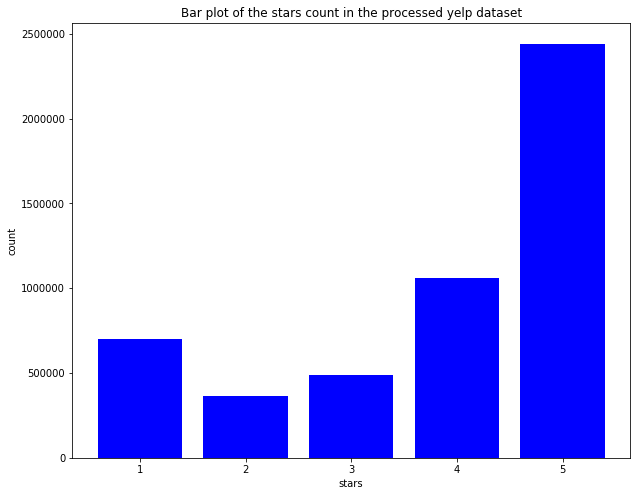

In [43]:
barplotfunc('stars', yelp_new, c = 'b')

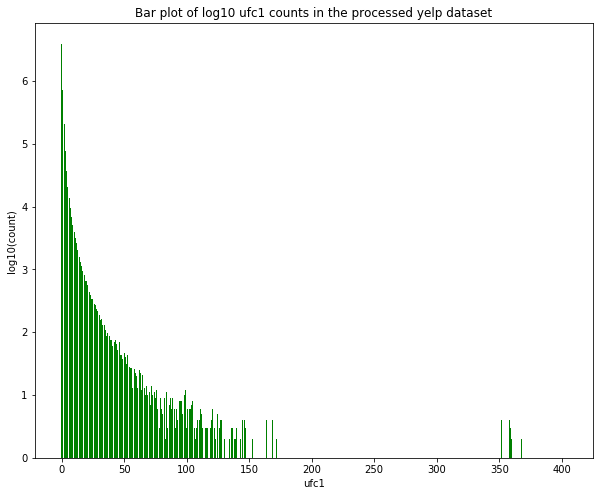

In [44]:
barplotfunc('ufc1', yelp_new, c = 'g', log = True)

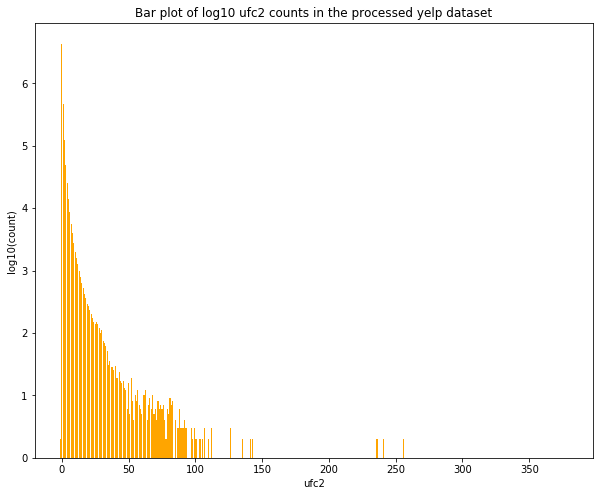

In [45]:
barplotfunc('ufc2', yelp_new, c = 'orange', log = True)

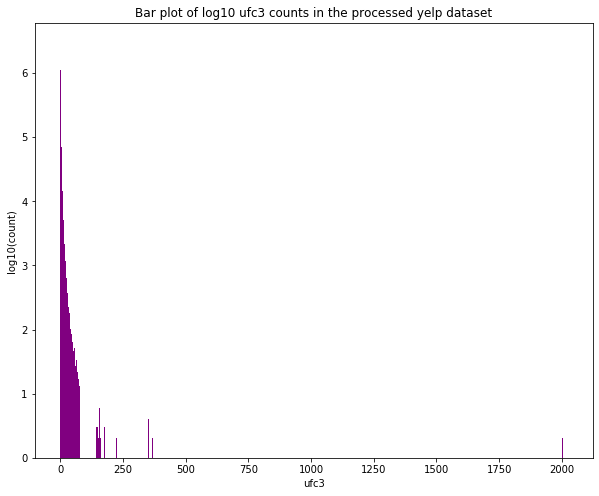

In [46]:
barplotfunc('ufc3', yelp_new, c = 'purple', log = True)

In [50]:
from pyspark.sql.functions import *

yelp_corr = yelp_new.select(['ufc1', 'ufc2', 'ufc3', 'stars'])

c11, c12 = yelp_corr.stat.corr('ufc1', 'ufc1'), yelp_corr.stat.corr('ufc1', 'ufc2')
c13, c14 = yelp_corr.stat.corr('ufc1', 'ufc3'), yelp_corr.stat.corr('ufc1', 'stars')
c21, c22 = c12, c11
c23, c24 = yelp_corr.stat.corr('ufc2', 'ufc3'), yelp_corr.stat.corr('ufc2', 'stars')
c31, c32 = c13, c23
c33, c34 = c11, yelp_corr.stat.corr('ufc3', 'stars')
c41, c42 = c14, c24
c43, c44 = c34, c11

In [76]:
r1 = [c11, c12, c13, c14]
r2 = [c21, c22, c23, c24]
r3 = [c31, c32, c33, c34]
r4 = [c41, c42, c43, c44]

Text(0.5, 1.05, 'Correlation matrix for the 4 numeric features in the yelp dataset')

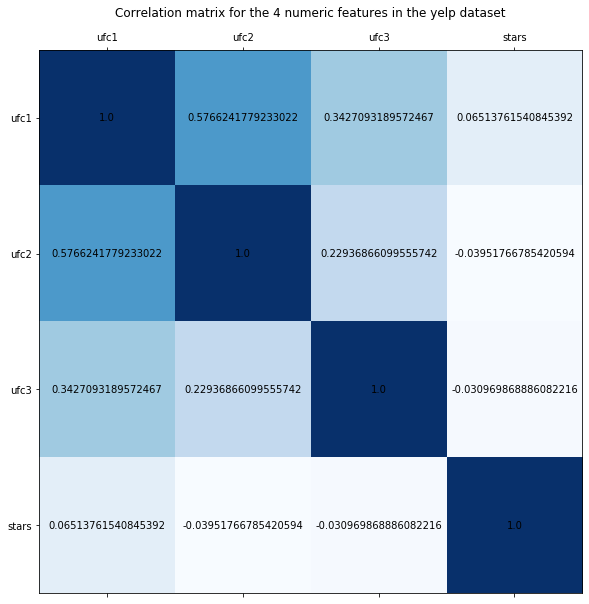

In [75]:
import numpy as np

fig, ax = plt.subplots(figsize = (10,10))

corr_matrix = np.array([r1, r2, r3, r4])
num2col = {0:'ufc1', 1:'ufc2', 2:'ufc3', 3:'stars'}
ax.matshow(corr_matrix, cmap=plt.cm.Blues)
labels = ['ufc1', 'ufc2', 'ufc3', 'stars']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

for i in range(4):
    for j in range(4):
        c = corr_matrix[j, i]
        ax.text(i, j, str(c), va='center', ha='center')
    
plt.title('Correlation matrix for the 4 numeric features in the yelp dataset')